## Indian Premier League (IPL) Regression Analysis

In this report we shall use regression analysis to examine the relationship between player wage spending by teams and win percentage within the IPL. We shall also look at the role of last season’s performance (lagged win percentage) and team specific fixed effects.  

### Loading data 

In [1]:
%%capture
# Due to the configuration of the base Jupter image, the following imports are required for the regressions in the assignment to report the correct metrics

import sys 
!{sys.executable} -m pip uninstall statsmodels --yes 
!{sys.executable} -m pip uninstall numpy --yes
!{sys.executable} -m pip uninstall pandas --yes 
!{sys.executable} -m pip uninstall patsy --yes 
!{sys.executable} -m pip install numpy==1.17
!{sys.executable} -m pip install pandas==1.0
!{sys.executable} -m pip install patsy==0.5.2
!{sys.executable} -m pip install statsmodels==0.11.1

In [2]:
# As usual, we begin by loading the packages we will need

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

In [16]:
# Now we load the data

IPL=pd.read_excel("Assignment Data/Week 5/IPL (assignment) data.xlsx")

In [17]:
pd.set_option('display.max_rows', 250)
display(IPL)

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000
5,2013,Chennai Super Kings,16,11,5,0,22,0.530,0,1,0,0,10740000
6,2014,Chennai Super Kings,14,9,5,0,18,0.385,0,0,1,0,11279000
7,2015,Chennai Super Kings,14,9,5,0,18,0.709,0,1,0,0,9780000
8,2018,Chennai Super Kings,14,9,5,0,18,0.253,1,0,0,0,11321760
9,2008,Deccan Chargers,14,2,12,0,4,-0.467,0,0,0,0,5885000


### Salary Spend

With our loaded dataframe we can look at how much all IPL teams spend on the salaries of their players for a given season. "year" is the season and "all_sal" is the total salaries of all the players in the league. 

In [18]:
#aggregate spend on player salaries
sumsal = IPL.groupby(['year'])['salaries'].sum().reset_index().rename(columns={'salaries':'all_sal'})
sumsal

,year,all_sal
0,2008,34105000
1,2009,33445000
2,2010,33075000
3,2011,62210000
4,2012,59706250
5,2013,81535000
6,2014,73973332
7,2015,65242665
8,2016,63483666
9,2017,63014833


Text(0, 0.5, 'total salary spend (x10,000,000)')

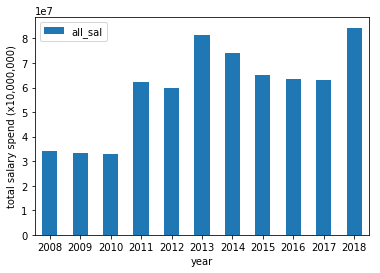

In [33]:
sumsal.plot.bar(x='year', y='all_sal', rot=0)
plt.ylabel('total salary spend (x10,000,000)')

After the 2010 season the player's salaries roughly doubled. Many factors contribute to this such as TV rights deals and companies sponsoring the league. Later we shall see if the increase in players pay leads to better overall performance. 

Merging the all season spend data with the IPL dataframe 

In [19]:
IPL = pd.merge(IPL, sumsal, on=['year'], how='left')
pd.set_option('display.max_rows', 250)
display(IPL)

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,all_sal
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250
5,2013,Chennai Super Kings,16,11,5,0,22,0.530,0,1,0,0,10740000,81535000
6,2014,Chennai Super Kings,14,9,5,0,18,0.385,0,0,1,0,11279000,73973332
7,2015,Chennai Super Kings,14,9,5,0,18,0.709,0,1,0,0,9780000,65242665
8,2018,Chennai Super Kings,14,9,5,0,18,0.253,1,0,0,0,11321760,84370160
9,2008,Deccan Chargers,14,2,12,0,4,-0.467,0,0,0,0,5885000,34105000


Relative salaries. This is how much a teams individual salary spend as a percentage of the total amount that was spent overall that season.

In [20]:
IPL['relsal']= IPL['salaries']/IPL['all_sal']

In [21]:
pd.set_option('display.max_rows', 250)
display(IPL)

,year,team,played,won,lost,noresult,points,netrunrate,champions,runnersup,third,fourth,salaries,all_sal,relsal
0,2008,Chennai Super Kings,14,8,6,0,16,-0.192,0,1,0,0,5825000,34105000,0.170796
1,2009,Chennai Super Kings,14,8,5,1,17,0.951,0,0,0,0,6765000,33445000,0.202272
2,2010,Chennai Super Kings,14,7,7,0,14,0.274,1,0,0,0,4890000,33075000,0.147846
3,2011,Chennai Super Kings,14,9,5,0,18,0.443,1,0,0,0,6330000,62210000,0.101752
4,2012,Chennai Super Kings,16,8,7,1,17,0.100,0,1,0,0,7900000,59706250,0.132314
5,2013,Chennai Super Kings,16,11,5,0,22,0.530,0,1,0,0,10740000,81535000,0.131723
6,2014,Chennai Super Kings,14,9,5,0,18,0.385,0,0,1,0,11279000,73973332,0.152474
7,2015,Chennai Super Kings,14,9,5,0,18,0.709,0,1,0,0,9780000,65242665,0.149902
8,2018,Chennai Super Kings,14,9,5,0,18,0.253,1,0,0,0,11321760,84370160,0.134192
9,2008,Deccan Chargers,14,2,12,0,4,-0.467,0,0,0,0,5885000,34105000,0.172555


creating win percentage variable

In [22]:
IPL['winpc']= IPL['won']/(IPL['played']-IPL['noresult'])

lagged win %

In [23]:
IPL['wpc_lag'] = IPL.groupby('team')['winpc'].shift(1)

Regression analysis

In [24]:
#relative salary effect on win percentage
reg1 = smf.ols(formula = 'winpc ~ relsal', data=IPL).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  winpc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1622
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.688
Time:                        18:14:45   Log-Likelihood:                 45.259
No. Observations:                  92   AIC:                            -86.52
Df Residuals:                      90   BIC:                            -81.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4752      0.063      7.563      0.0

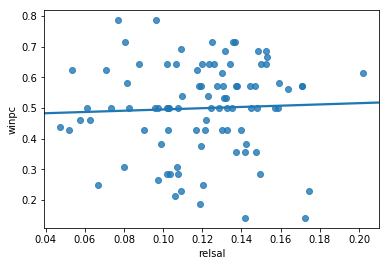

In [14]:
sns.regplot(x="relsal", y="winpc", data = IPL, ci=False)

In [25]:
#relative salary+lagged win % effect on win %
reg2 = smf.ols(formula = 'winpc ~ wpc_lag+relsal', data=IPL).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  winpc   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.591
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.210
Time:                        18:14:52   Log-Likelihood:                 43.314
No. Observations:                  79   AIC:                            -80.63
Df Residuals:                      76   BIC:                            -73.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3489      0.087      4.003      0.0

In [26]:
#relative salary+lagged win % effect on win %
reg3 = smf.ols(formula = 'winpc ~ relsal+wpc_lag+C(team)', data=IPL).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                  winpc   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     2.117
Date:                Thu, 27 Apr 2023   Prob (F-statistic):             0.0245
Time:                        18:14:54   Log-Likelihood:                 55.639
No. Observations:                  79   AIC:                            -83.28
Df Residuals:                      65   BIC:                            -50.10
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------